# Necessary libraries

````python
conda install ipython
conda install jupyter
pip install scikit-learn
pip install scikit-image
pip install imutils
pip install pillow
pip install opencv-python
conda install keras
conda install tensorflow
pip install seaborn
pip install mlxtend
```` 
   




## First you should install all libraries and go through the notebook about preprocessing


# Principal Component Analysis (PCA)

In statistics, principal component analysis (PCA) is a technique used to describe a data set in terms of new uncorrelated variables ("components"). Components are ordered by the amount of original variance they describe, so the technique is useful for reducing the dimensionality of a data set.

Technically, PCA looks for the projection according to which the data is best represented in terms of least squares. It converts a set of observations of possibly correlated variables into a set of linearly uncorrelated variable values called principal components.

The PCA is mainly used in exploratory data analysis and to build predictive models. The PCA involves calculating the eigenvalue decomposition of the covariance matrix, normally after centering the data on the mean of each attribute.

For additional details :


https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales

https://www.cienciadedatos.net/documentos/35_principal_component_analysis

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

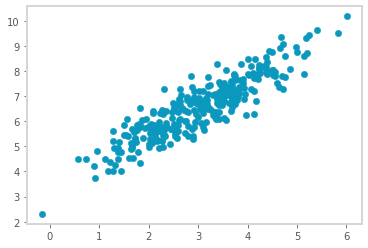

In [8]:
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
X = np.array([b1, b2]).T
c="#0A98BE"
plt.scatter(X[:,0], X[:,1], c=c, s=40);



(-5.0, 5.0, -5.0, 5.0)

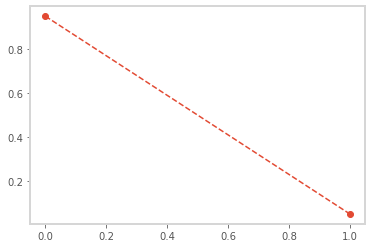

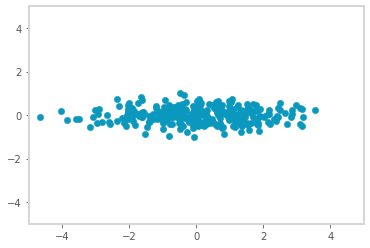

In [9]:
pca = PCA(n_components=2)
pca.fit(X)  
plt.figure(1)
plt.plot(pca.explained_variance_ratio_,'o--')  

#generar una transformacion de los datos usando el modelo PCA
Xnew = pca.transform(X)

#graficar datos para comparar el resultado

fig = plt.figure(2)
plt.scatter(Xnew[:,0], Xnew[:,1], c=c, s=40);
plt.axis([-5,5,-5,5])

# Introduction to artificial neural networks:
A document is attached that you should read to be clear about some of the concepts.
The sklearn tool is used to define a classifier based on neural networks. In this particular case, the multilayer perceptron neural network (Multi Layer Perceptron -MLP) will be used.

Additional details

https://scikit-learn.org/stable/modules/neural_networks_supervised.html


````python
from sklearn.neural_network import MLPClassifier
MLPClassifier(alpha=1, max_iter=1000)
````

In this way, a perceptron-type classifier is generated with the default parameters that are defined in the tool and keeping in mind the neural network model is the one observed in next Figure. However, to take advantage of the model, it is necessary to modify the default parameters and for this it is necessary to be clear about what each one means, it is recommended to read the documentation.

<img src="ann/img1.png" width="300">


First, you must have data to train the model. To illustrate the process, artificial data will be used, in a similar way as has been done in other cases.
For this they will use the following functions  generate data in two dimensions or in three dimensions.

````python

#Luego de importar el modulo, es posible generar datos de  forma artificial en 2D o 3D
X,Y=createData2D()
X,Y=createData3D()
````

Initially it is assumed that the data is in two dimensions. Then an instance of the MLP model is created, in this case the size of the hidden layers will be defined. To define this parameter you pass in a tuple the number of neurons you want in each layer, for simplicity we will use 2 layers.
````python
mlp = MLPClassifier(hidden_layer_sizes=(2,3,5,6), activation=’logistic’)
````

A classifier is generated with 2 neurons in the input layer, 3 in the hidden layer. 2 in the input for the number of features, remember that the data is in 2 dimensions, 3 in the hidden layer is an arbitrary value. Having the data and the model, the training can now be carried out. Remember that two arrays are required, the array X of size (number of samples, number of features) with the data or features per sample, and the array Y (number of samples, 1) which are the labels.
````python
mlp.fit(X,Y)
````

New data can be artificially generated for testing

````python
X_test,Y_test=createData2D(N=[100,100,100])
predictions = mlp.predict(X_test)
````

See examples below, in the second example data in three dimensions is used, that is, with 3 characteristics. Vary the number of neurons in the hidden layer as well as the number of iterations to see its effect on the final performance.



In [5]:
from sklearn.linear_model import LogisticRegression

from mlxtend.data import loadlocal_mnist
#### definir funciones
def center(X):
    Mu =np.mean(X, axis = 0)
    newX = X - Mu
    return newX, Mu

def standardize(X):
    sigma = np.std(X, axis = 0)
    newX = center(X)/sigma
    return newX, sigma
    
def whiten(X):
    newX, Mu = center(X)
    cov= np.cov(newX, rowvar=False, bias=True)
    #  Calcular los valores y vectores propios
    eigVals, eigVecs = np.linalg.eig(cov)
    eigVecs = np.real(eigVecs)
    eigVals = np.real(eigVals)
    # Aplicar los vectores propios a los datos (rotar)
    newX = newX.dot(eigVecs)
    # Re-escalar los datos
    newX = newX / np.sqrt(eigVals + 1e-5)
    return  newX,  Mu,  eigVecs, eigVals

#solo para los datos de test
def whitenTest(X_test,Mu,eigVecs,eigVals):
    newX = X_test -Mu
    # Aplicar los vectores propios a los datos (rotar)
    newX = newX.dot(eigVecs)
    # Re-escalar los datos
    newX = newX / np.sqrt(eigVals + 1e-5)
    return  newX   

def createData2D(N=[500,500,500]):
    #generar puntos de forma artificial para 3 clases
    #definir valor medio y desviacion
    #np.random.seed(1234)
    m = np.array([[0.7,5],[2,0.5],[4,4]])
    s = np.array([[3.5,2],[1,4.5],[1,1]])
    X=np.array([])
    Y=np.array([])

    for ii in range(len(N)):
        x1 = np.random.normal(m[ii,0], s[ii,0], N[ii])
        x2 = np.random.normal(m[ii,1], s[ii,1], N[ii])
        x = np.array([x1, x2]).T 
   
        if ii==0:
          X= x
        else:
          X=np.vstack((X,x))
        y=np.ones(N[ii])*ii; 
        Y= np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y
##################################################################    
def createData3D(N=[500,500,500]):
    #generar puntos de forma artificial para 3 clases
    #definir valor medio y desviacion
    np.random.seed(1234)
    m = np.array([[0.7,3,3],[2,2,0.5],[4,4,0]])
    s = np.array([[2.5,2,4],[1,0.3,2],[1,3,0.5]])
    X=np.array([])
    Y=np.array([])

    for ii in range(len(N)):
        x1 = np.random.normal(m[ii,0], s[ii,0], N[ii])
        x2 = np.random.normal(m[ii,1], s[ii,1], N[ii])
        x3 = np.random.normal(m[ii,2], s[ii,2], N[ii])
        x = np.array([x1, x2, x3]).T 
        if ii==0:
          X = x
        else:
          X=np.vstack((X,x))
        y = np.ones(N[ii])*ii; 
        Y = np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y


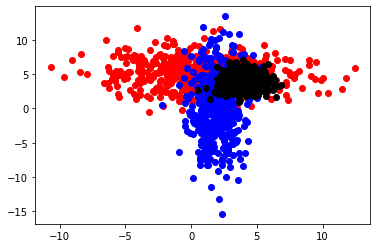

success rate:  33.33333333333333


In [6]:
from sklearn.neural_network import MLPClassifier

#crear datos
X,Y=createData2D()
#mostrar datos
labels=np.unique(Y)
plt.figure(1)
color='rbk'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)
plt.show()        
#crear modelo
mlp = MLPClassifier(hidden_layer_sizes=(2,30,10,3), activation='logistic',max_iter=1000)

mlp.fit(X,Y)

#generar nuevos datos aleatorios para evaluar el clasificador
#100 por cada clase
X_test,Y_test=createData2D(N=[100,100,100])
predictions = mlp.predict(X_test)

#calcular porcentaje de acierto

por=np.sum(predictions==Y_test)/Y_test.size*100

print("success rate: ", por)

In [18]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Activity.
Get familiar with the pre-processing methods described in the first part, for this, you should illustrate the result of applying whitening and PCA on data.

1. Using the iris.data and diabetes.data database, apply PCA to reduce the dimension of the data before starting the training and classification process. In this case, use a linear classifier and classify the three classes for the iris database.

For IRIS: reduce to two dimensions
For DIABETES: reduce to four dimensions

2. Implement a classifier using an MLP and perform the same task as before. That is, using PCA to reduce the dimension of the data and then using such data with reduced dimension to train an MLP.

3. Apply whitening to the mnist database and implement a linear classifier to classify the 10 digits.

Take into account that there are two sets, training and test, for this the procedure will be carried out separately for the set as follows:
see example below for details

- Use the training set to calculate the eigenvalues and eigenvectors and generate the rotation matrix:

````python
#normalize by 255
X=X/255
X_test=X_test/255
#Apply whithen
Xw,Mu,eigVecs, eigVals = whiten(X)
````
- use the variables Mu, eigVecs and eigVals to transform the test data. A new function is defined solely for test:


````python
def whitenTest(X_test,Mu,eigVecs,eigVals):
	    newX = X_test -Mu
	    # 
	    newX = newX.dot(eigVecs)
	    # 
	    newX = newX / np.sqrt(eigVals + 1e-5)
	    return  newX   

#usar la funcion
X_test = whitenTest(X_test,Mu,eigVecs)
````
4. Compare the performance of the linear classifier with an MLP classifier.



### Submit a report with the results and conclusions of the tests performed


In [7]:
from sklearn.model_selection import train_test_split
data = np.loadtxt('datosML/diabetes.data',delimiter=',')
data
X = data[:,:8]
y = data[:,8].astype(int)

print("[INFO]\nX: %s\nY: %s"%(X.shape,y.shape))
# train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[INFO]
X: (768, 8)
Y: (768,)


In [8]:
def loadIris():
    #load iris dataset
    file_name='datosML/iris.data'
    labels={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

    hf = open(file_name,'r')
    lines=hf.readlines()
    hf.close()
    ##############################
    x=[]
    y=[]
    for line in lines:
      #
        data = line[:-1].split(',')
        y.append(labels[data[-1]])
        x.append([float(i) for i in data[:-1]])

    #
    x=np.array(x)
    y=np.array(y)
    return x,y

In [9]:



#load data
#
X, y = loadlocal_mnist(
        images_path='MNIST/train-images-idx3-ubyte', 
        labels_path='MNIST/train-labels-idx1-ubyte')
#conjunto de prueba
X_test, y_test= loadlocal_mnist(
        images_path='MNIST/t10k-images-idx3-ubyte', 
        labels_path='MNIST/t10k-labels-idx1-ubyte')

#dividir entre 255
X=X/255
X_test=X_test/255        
#apply whiten
Xw, Mu,  eigVecs, eigVals =whiten(X)
X_test = whitenTest(X_test,Mu,eigVecs, eigVals)
#your code goes here





# For better performance, tools such as Tensorflow, keras and pytorch are currently used. Please review the two examples attached to this notebook.